In [2]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest

pio.templates.default = "plotly_white"

In [5]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()
# Missing values in total_bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
import plotly.figure_factory as ff

columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income',
           'median_house_value']

fig = make_subplots(rows=3, cols=3, start_cell="bottom-left", subplot_titles=columns)

for i in range(1, 4):
    for j in range(1, 4):
        # Create KDE plot for each column
        kde_plot = ff.create_distplot([housing[columns[i + j - 2]].dropna()], group_labels=[columns[i + j - 2]], show_hist=False, show_rug=False)
        # Add KDE plot traces to the subplots
        for trace in kde_plot['data']:
            trace.update(showlegend=False)
            fig.add_trace(trace, row=i, col=j)

fig.update_layout(height=1000, width=1000,
                  title_text="KDE Plot for Data Distribution")
import plotly.io as pio
pio.renderers.default = "browser"


fig.show()

In [13]:
temp_housing = housing.copy()

In [14]:
# Create a Plotly scatter plot
fig = px.scatter(
    temp_housing,
    x='longitude',
    y='latitude',
    size='median_house_value',  # Use 'size' to scale by house value
    color= housing['ocean_proximity'],    # Use color to differentiate by ocean proximity
    title="Analysis between Longitude, Latitude, Ocean Proximity, and House Values",
    labels={'longitude': 'Longitude', 'latitude': 'Latitude', 'median_house_value': 'Median House Value'}
)

# Update layout for better appearance
fig.update_layout(
    autosize=True,
    margin=dict(r=10, t=50, b=40, l=40),
    showlegend=True,
)

fig.show()

> Housing values are `higher in the Bay Area` and  the `area near the ocean`, and they `decrease as you move towards land region`

In [15]:
fig = px.scatter(
    temp_housing,
    x='longitude',
    y='latitude',
    size='median_house_value',
    color=temp_housing['median_income'] * 10000,
    title="Analysis between Median Income and House Values",
    labels={'longitude': 'Longitude', 'latitude': 'Latitude', 'median_income': 'Median Income', 'median_house_value': 'Median House Value'},
    hover_data=['median_income', 'median_house_value']
)

# Update layout for better appearance
fig.update_layout(
    autosize=True,
    margin=dict(r=10, t=50, b=40, l=40),
    showlegend=True
)

# Show the plot
fig.show()


> `Median Salary` is `strongly correlated` with Housing Values

In [16]:
fig = px.scatter(
    temp_housing,
    x='longitude',
    y='latitude',
    size='median_house_value',
    color=temp_housing['population'],
    title="Analysis between Population and House Values",
    labels={'longitude': 'Longitude', 'latitude': 'Latitude', 'population': 'Population', 'median_house_value': 'Median House Value'},
    hover_data=['population', 'median_house_value']
)

fig.update_layout(
    autosize=True,
    margin=dict(r=10, t=50, b=40, l=40),
    showlegend=True
)

fig.show()


The `population` is denser in Near Bay and Near Ocean areas, where housing prices are correspondingly higher. Conversely, Inland regions have a sparser population and consequently lower housing prices.

In [17]:
fig = px.scatter(
    temp_housing,
    x='total_rooms',
    y='total_bedrooms',
    size = 'housing_median_age',
    color=temp_housing['median_house_value'],
    title="Analysis between Total Rooms, Total Bedrooms and House Values",
    labels={'total_rooms': 'Total Rooms', 'total_bedrooms': 'Total Bedrooms', 'median_house_value': 'Median House Value'},
    hover_data=['total_rooms', 'total_bedrooms', 'median_house_value']
)

fig.update_layout(
    autosize=True,
    margin=dict(r=10, t=50, b=40, l=40),
    showlegend=True
)

fig.show()


The association between the `total number` of `rooms` and `bedrooms` with the `price` is `weaker than expected`. For instance, the data point in the top right shows the highest number of rooms and bedrooms, yet the average price for properties there is relatively low compared to others. This discrepancy could be due to factors such as `location, the size of the bedrooms/rooms, and other differing variables`.

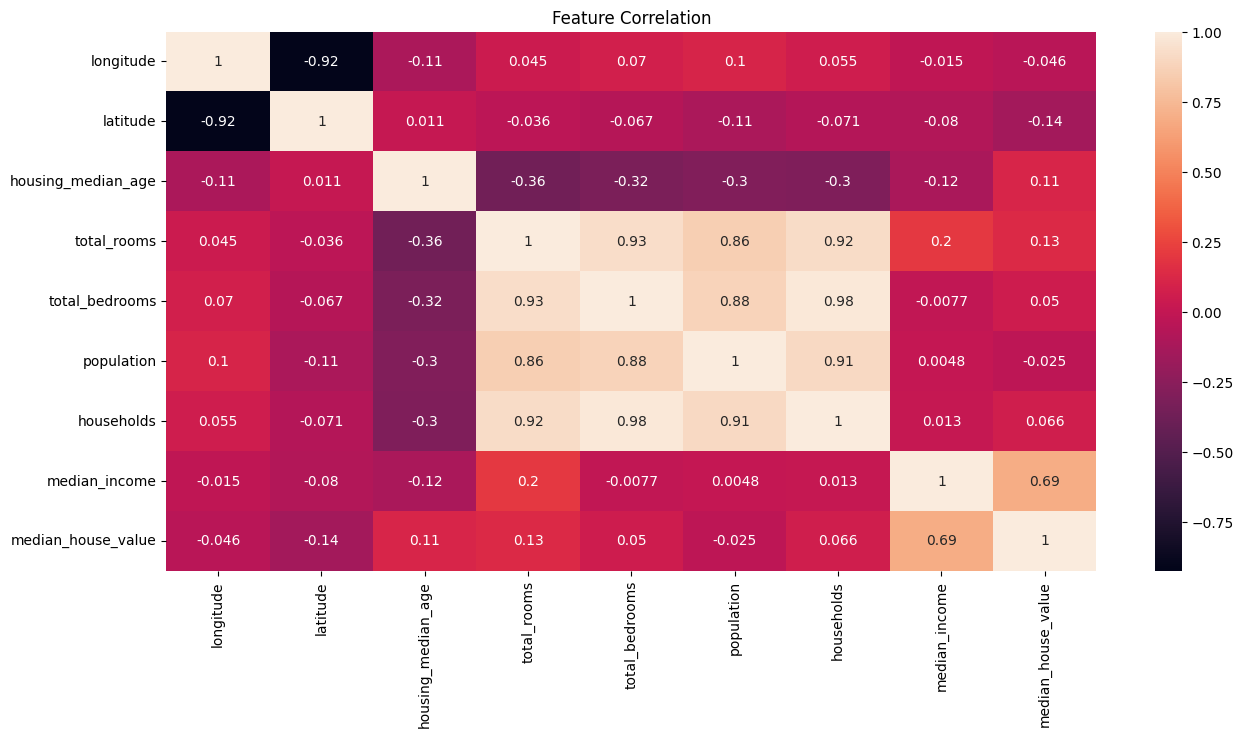

In [18]:
corr_matrix = housing.corr(numeric_only=True)

plt.figure(figsize=(15, 7))
sns.heatmap(data=corr_matrix, annot=True, cbar=True)
plt.title("Feature Correlation")
plt.show()

`Correlation` may not be the ideal metric to assess whether a particular feature is strongly associated with the target variable, especially when the data does not exhibit a `linear relationship`.

In [19]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income',
           'median_house_value']

fig = go.Figure()

for i, col in enumerate(columns):
    fig.add_trace(go.Box(
        x=((temp_housing[col] - temp_housing[col].mean()) / temp_housing[col].std()),
        name=f"{col}",
        showlegend = False
    ))

fig.update_layout(width=1000, height=600)

fig.show()


The features like `Households`, `Population`, `Total Bedrooms`, `Total Rooms` Cotntains huge number of outliers

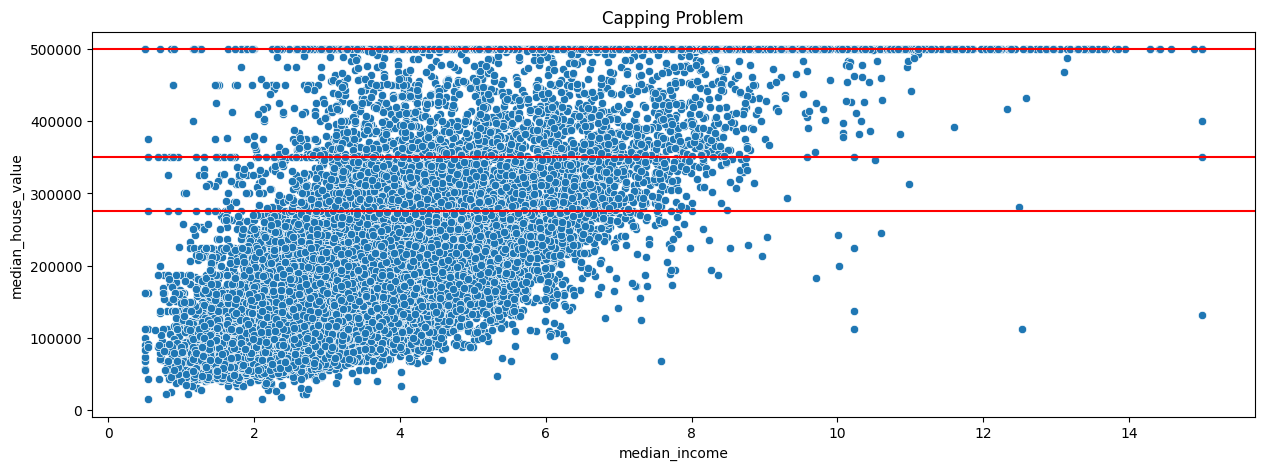

In [20]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x = temp_housing['median_income'], y = temp_housing['median_house_value'])
plt.axhline(y = 500000, color = 'red')
plt.axhline(y = 350000, color = 'red')
plt.axhline(y = 275000, color = 'red')

plt.title("Capping Problem")
plt.show()

> The `price cap` that we noticed is clearly visible as a horizontal line at 💲500,000. But this plot reveals other less obvious straight lines: a horizontal line around 💲450,000, another around 💲350,000, perhaps one around 💲275,000, and a few more below that.

> You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

In [21]:
# Feature Encoding
ohe = OneHotEncoder()
encoded = ohe.fit_transform(temp_housing[['ocean_proximity']]).toarray()
decoded = pd.DataFrame(encoded, columns=['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'])
temp_housing = pd.concat([temp_housing, decoded], axis=1)
temp_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0


In [22]:
# Handling Missing Values
imputer = KNNImputer(n_neighbors = int(np.sqrt(temp_housing.shape[0])))
temp_housing['total_bedrooms'] = imputer.fit_transform(temp_housing.drop(columns = ['ocean_proximity']))[:, 4:5]

In [23]:
temp_housing['total_bedrooms'].isna().values.sum()

0

In [24]:
# Outlier Detection using IsolationForest
isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(temp_housing.drop(columns = ['ocean_proximity']))

In [25]:
(outlier_pred == -1).sum() # Total outliers

5031

In [26]:
print(outlier_pred)
temp_housing = temp_housing.iloc[outlier_pred == 1]

[-1 -1 -1 ...  1  1  1]


In [27]:
temp_housing.shape

(15609, 15)

In [28]:
# Creating new Features using existing features

temp_housing["rooms_per_house"] = temp_housing["total_rooms"] / temp_housing["households"]
temp_housing["people_per_house"] = temp_housing["population"] / temp_housing["households"]
temp_housing["bedrooms_ratio"] = temp_housing["total_bedrooms"] / temp_housing["total_rooms"]

In [29]:
# Standardizing the data

scaler_std = StandardScaler()
scaled_housing = pd.DataFrame(scaler_std.fit_transform(temp_housing.drop(columns = ['ocean_proximity'])), columns=scaler_std.feature_names_in_)

scaled_housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_house,people_per_house,bedrooms_ratio
4415,-0.855088,0.965379,-1.908850,0.581380,0.355492,0.204843,0.398587,-0.663847,-0.854441,-1.039808,1.350984,-0.01601,-0.224823,-0.291182,0.089111,-0.319616,-0.439043
10266,0.589867,-0.666090,-0.261603,-1.369485,-0.890740,-0.864451,-0.925756,-1.501102,-0.591635,0.961716,-0.740201,-0.01601,-0.224823,-0.291182,-0.966920,-0.062424,2.365617
3703,-0.426546,0.760837,-1.475364,0.520776,0.561670,0.755215,0.452743,-1.442478,-1.303488,-1.039808,1.350984,-0.01601,-0.224823,-0.291182,-0.019080,0.405918,-0.058623
4942,-1.635254,1.535176,-0.608392,-1.596509,-1.600909,-1.737184,-1.728239,-0.950537,-0.347453,-1.039808,1.350984,-0.01601,-0.224823,-0.291182,0.759341,-1.274860,-0.236098
1861,-1.289124,2.109842,0.692067,-0.839443,-0.716634,-1.061012,-0.822369,-1.178196,-1.198986,-1.039808,1.350984,-0.01601,-0.224823,-0.291182,-0.113692,-0.912384,0.234493


> `log-transformation` - This transform is useful when there is a heavy tailed distribution (skewed)

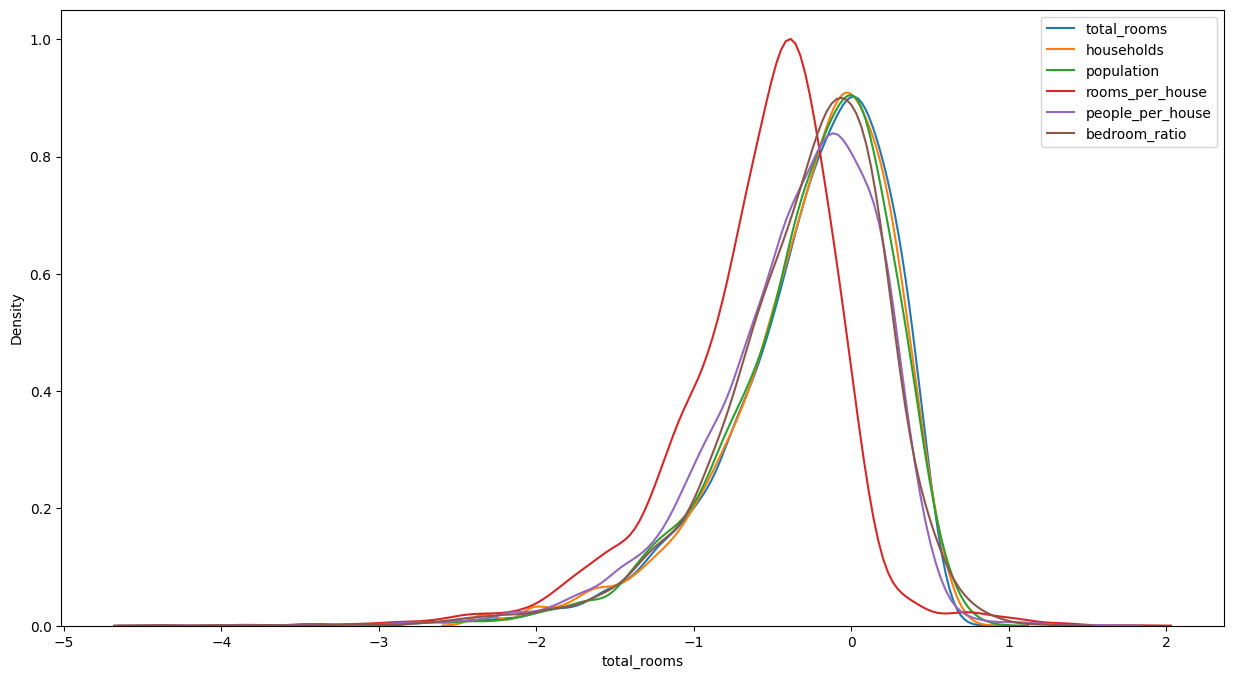

In [30]:
plt.figure(figsize=(15, 8))
sns.kdeplot(scaled_housing['total_rooms'].apply(np.log10), label = 'total_rooms')
sns.kdeplot(scaled_housing['households'].apply(np.log10), label = 'households')
sns.kdeplot(scaled_housing['population'].apply(np.log10), label = 'population')
sns.kdeplot(scaled_housing['rooms_per_house'].apply(np.log10), label = 'rooms_per_house')
sns.kdeplot(scaled_housing['people_per_house'].apply(np.log10), label = 'people_per_house')
sns.kdeplot(scaled_housing['bedrooms_ratio'].apply(np.log10), label = 'bedroom_ratio')

plt.legend()
plt.show()

> `Bucketezing` - This transform is useful when there is a heavy tailed distribution (skewed)

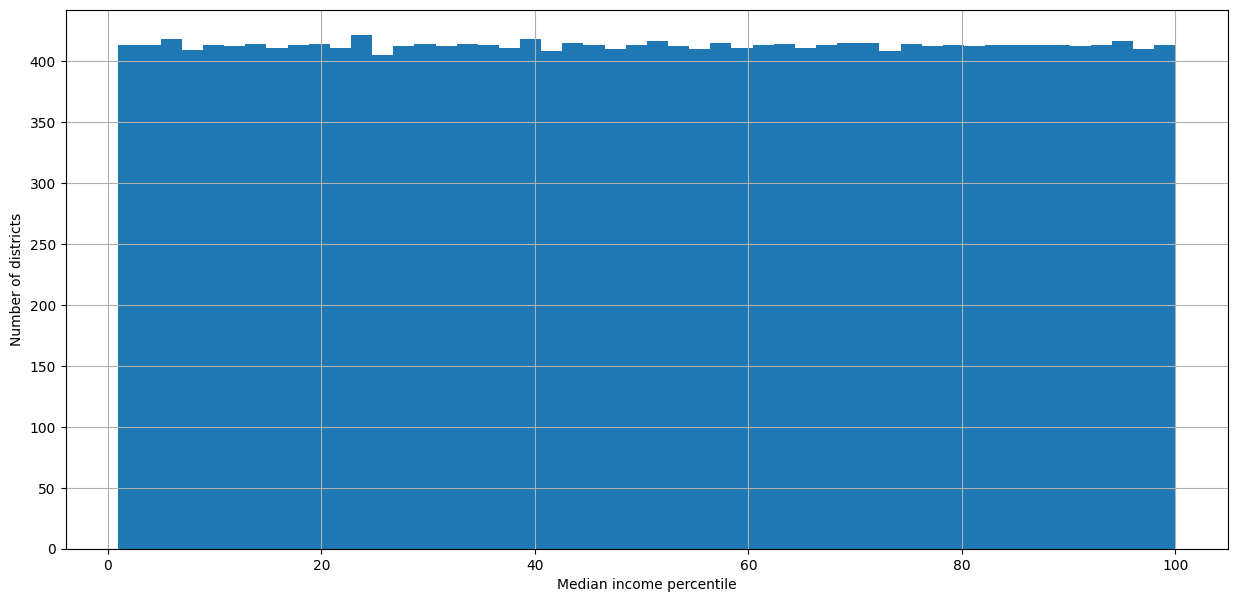

In [31]:
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
plt.figure(figsize=(15, 7))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()

> When a feature has a `MultiModal Distribution` it can also be `bucketizing` it, but treating buckets ID's as category rather than numerical values and transform them using `OneHotEncoding` - These transformation will perform good on `Regression` Models.

## Handling Housing median column

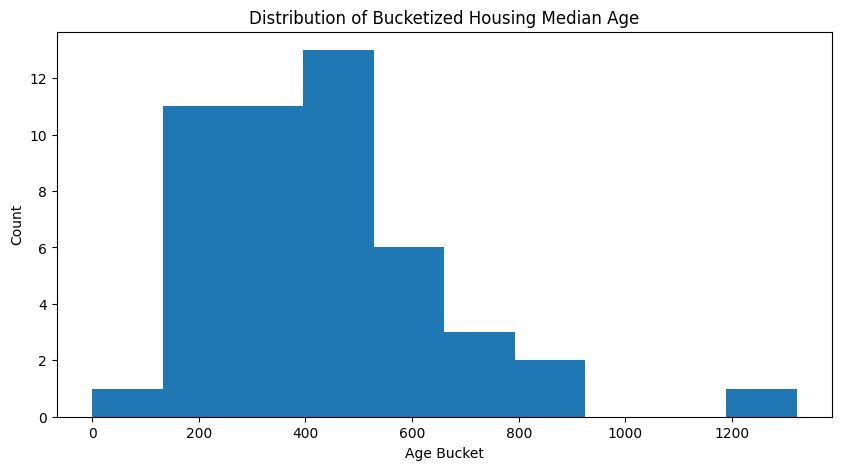

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# bucketizing
percentiles = [np.percentile(housing['housing_median_age'], p) for p in range(1, 100)]
encoded = pd.cut(housing['housing_median_age'], bins=[-np.inf] + percentiles + [np.inf], duplicates='drop')

plt.figure(figsize=(10, 5))
plt.hist(encoded.value_counts())
plt.title("Distribution of Bucketized Housing Median Age")
plt.xlabel("Age Bucket")
plt.ylabel("Count")
plt.show()




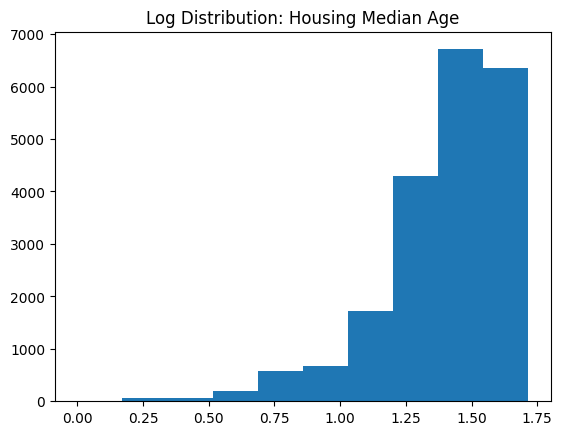

In [37]:
plt.hist(housing['housing_median_age'].apply(np.log10))
plt.title("Log Distribution: Housing Median Age")
plt.show()


In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create working copy of housing dataframe
temp_housing5 = housing.copy()

# Bucketizing
percentiles = [np.percentile(housing['housing_median_age'], p) for p in range(1, 100)]
encoded = pd.cut(housing['housing_median_age'], bins=[-np.inf] + percentiles + [np.inf], duplicates='drop')

# One-hot encoding bucket values
ohe = OneHotEncoder()
decoded = pd.DataFrame(
    ohe.fit_transform(encoded.astype(str).values.reshape(-1, 1)).toarray().astype(np.int64),
    columns=[f"bin_{i}" for i in range(1, ohe.categories_[0].size + 1)]
) / 5

# Merging encoded values
temp_housing5 = pd.concat([temp_housing5, decoded], axis=1)

temp_housing5.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,bin_38,bin_39,bin_40,bin_41,bin_42,bin_43,bin_44,bin_45,bin_46,bin_47
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0


In [40]:
X = temp_housing5.drop('median_house_value', axis=1)
y = temp_housing5.loc[:, 'median_house_value']

In [42]:
# Create feature dataset if not already defined
X = housing.copy()

# Fill missing numeric values
if 'total_bedrooms' in X.columns:
    X['total_bedrooms'] = X['total_bedrooms'].fillna(X['total_bedrooms'].mean())

# Create bedrooms ratio if missing
if 'bedrooms_ratio' not in X.columns:
    X['bedrooms_ratio'] = X['total_bedrooms'] / X['total_rooms']

# Fill missing ratio values
X['bedrooms_ratio'] = X['bedrooms_ratio'].fillna(X['bedrooms_ratio'].mean())

X.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096


> `LinearRegression` - just for checking the performance of this transformation

In [44]:
# Target
y = housing["median_house_value"]

# Features
X = housing.drop("median_house_value", axis=1).copy()
# Convert categorical 'ocean_proximity' to dummy/one-hot variables
X = pd.get_dummies(X, columns=["ocean_proximity"], drop_first=True)
X = X.fillna(X.mean(numeric_only=True))
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print("R² on full data:", r2_score(y, y_pred))
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² on test set:", r2_score(y_test, y_pred))


R² on full data: 0.6454747751244777
R² on test set: 0.6490111896409527


> ### FEATURE TRANSFORMATION USING `CUSTOM TRANSFORMERS`

In [45]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)
log_population = log_transformer.transform(temp_housing5['population'])

log_population.to_frame().head()

,population
0,5.774552
1,7.783641
2,6.206576
3,6.324359
4,6.336826


> `Custom Transformers` are also useful to combine features.

In [46]:
ratio_transformer = FunctionTransformer(lambda col: col[:, 0] / col[:, 1])
rooms_per_house = ratio_transformer.transform(np.array(temp_housing5.loc[:, ['total_rooms', 'households']]))
rooms_per_house

array([6.98412698, 6.23813708, 8.28813559, ..., 5.20554273, 5.32951289,
       5.25471698])

> `Custom Transformers` are also useful to Data Cleaning.

In [47]:
def replace_nan_with_mean(X):
    mean_value = np.nanmean(X)  # Compute mean while ignoring NaNs
    return np.where(np.isnan(X), mean_value, X)

ratio_transformer = FunctionTransformer(func=replace_nan_with_mean) # You cannot write inline function for this.
ratio_transformer.transform(np.array(housing['total_bedrooms']).ravel())

array([ 129., 1106.,  190., ...,  485.,  409.,  616.])

> ### CUSTOM TRANSFORMER CLASS - `StandardScaler`

Creating our own StandardScaler transformer who contains `fit` and `transform` method

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

In [49]:
class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init(self, with_mean = True): # no *args and **kwargs
        self.with_mean = with_mean

    def fit(self, X, y = None):
        X = check_array(X) # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1] # Stores the number of features
        # self.features_names_in_ = X.columns # Stores the names of the features - For DataFrame
        return self

    def transform(self, X):
        check_is_fitted(self) # Fetch the learned attributes
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1] # and self.features_names_in_ == X.columns
        X = X - self.mean_
        return X / self.std_

In [50]:
std_transformer = StandardScalerClone()
std_transformer.fit(np.array(temp_housing5.loc[:, ['median_income']]))
std_transformer.transform(np.array(temp_housing5.loc[:, ['median_income']]))

array([[ 2.34476576],
       [ 2.33223796],
       [ 1.7826994 ],
       ...,
       [-1.14259331],
       [-1.05458292],
       [-0.78012947]])

<hr>

> # **MACHINE LEARNING PIPELINES**

> - The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
steps. All but the last estimator must be transformers (i.e., they must have a
fit_transform() method). The names can be anything you like.

> - When you call the pipeline’s fit() method, it calls fit_transform() sequentially on
all transformers, passing the output of each call as the parameter to the next call, until
it reaches the final estimator, for which it just calls the fit() method.

> - The pipeline exposes the same methods as the final estimator. In this example, the last
estimator is a StandardScaler, which is a transformer, so the pipeline has a trans
form() method that applies all the transforms to the data in sequence (it also has a
fit_transform method that we could have used instead of calling fit() and then
transform()).

In [51]:
temp_housing6 = housing.copy()
temp_housing6.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

> Pipeline for `Numerical Features`

In [53]:
num_feature_pipeline = Pipeline([
    ('simpleimputer', SimpleImputer(strategy='median')), # Handling missing values
    ('standardscaler', StandardScaler()) # Feature Scaling
])

new_temp6 = num_feature_pipeline.fit_transform(temp_housing6.drop('ocean_proximity', axis=1))

pd.DataFrame(new_temp6, columns=num_feature_pipeline.get_feature_names_out()).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900


> Pipeline for `Categorical Features`

In [54]:
cat_feature_pipeline = Pipeline([
    ('simpleimputer', SimpleImputer(strategy='most_frequent')), # Handling missing values
    ('ohe', OneHotEncoder()) # Feature Scaling
])

new_temp6 = cat_feature_pipeline.fit_transform(temp_housing6['ocean_proximity'].to_frame()).toarray()

pd.DataFrame(new_temp6, columns=['<1H_OCEAN', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN']).astype(np.int32).head()

,<1H_OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


> ### ColumnTransformer

> A single transformer who capable of doing both numerical and caterogical transformations
Basically, we are creating a pipeline of pipelines.

In [55]:
from sklearn.compose import ColumnTransformer, make_column_selector # Used to select columns based of there datatype

preprocessing = ColumnTransformer([
    ('num', num_feature_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_feature_pipeline, make_column_selector(dtype_include=np.object_))
])

pd.DataFrame(preprocessing.fit_transform(temp_housing6), columns=preprocessing.get_feature_names_out()).head()
# Here we dont require toarray() reason ⬇️

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,num__median_house_value,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,0.0,1.0,0.0


> The `OneHotEncoder` returns a `Sparse Metrix` and `num_feature_pipeline` returns a `Dense Metrix` : When there is such a mix of sparce and dense metrices, the `ColumnTransformer` estimates the `Density of final metrix (i.e. The number of non zero cells)` and it returns a `sparce matrix` if `density is lower than given given threshold` by `default sparce_threshold = 0.3`, Otherwise `dense matrix.`

> ### COMBINING ALL THE TRANSFORMATION DONE SO FAR

In [56]:
def column_ratio(X):
    return X[:, [0]]/X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ['ratio']

In [57]:
# Pipelines for numerical columns
def ratio_pipeline():
    return Pipeline([
        ('simpleimputer', SimpleImputer(strategy='median')),
        ('ratio_calculater', FunctionTransformer(func=column_ratio, validate=False, feature_names_out=ratio_name)),
        ('standardscaler', StandardScaler())
    ])

def log_pipeine():
    return Pipeline([
        ('simpleimputer', SimpleImputer(strategy='median')),
        ('log_calculater', FunctionTransformer(np.log, feature_names_out='one-to-one')),
        ('standardscaler', StandardScaler())
    ])

# Pipeline for categorical columns
def cat_pipeline():
    return Pipeline([
        ('simpleimputer', SimpleImputer(strategy='most_frequent')), # Handling missing values
        ('ohe', OneHotEncoder()) # Feature Scaling
    ])

# Pipeline for remaining columns
def default_pipeline():
    return Pipeline([
        ('simpleimputer', SimpleImputer(strategy='median')),
        ('standardscaler', StandardScaler())
    ])

preprocessing = ColumnTransformer([
    # Ratio Transformation
    ('bedrooms_ratio', ratio_pipeline(), ['total_bedrooms', 'total_rooms']),
    ('rooms_per_house', ratio_pipeline(), ['total_rooms', 'households']),
    ('people_per_house', ratio_pipeline(), ['population', 'households']),
    # Log Transformation
    ('log', log_pipeine(), ['total_bedrooms', 'total_rooms', 'population', 'households', 'median_income']),
    # Categorical Transformation
    ('cat', cat_pipeline(), make_column_selector(dtype_include=np.object_))
], remainder=default_pipeline())

In [58]:
preprocessed_df = pd.DataFrame(preprocessing.fit_transform(housing), columns=preprocessing.get_feature_names_out())
preprocessed_df.head()

,bedrooms_ratio__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age,remainder__median_house_value
0,-1.029988,0.628559,-0.049597,-1.634226,-1.129255,-1.692016,-1.561311,1.858786,0.0,0.0,0.0,1.0,0.0,-1.327835,1.052548,0.982143,2.129631
1,-0.888897,0.327041,-0.092512,1.312871,1.648839,1.028461,1.440853,1.852703,0.0,0.0,0.0,1.0,0.0,-1.322844,1.043185,-0.607019,1.314156
2,-1.291686,1.155620,-0.025843,-1.103136,-0.449227,-1.107018,-1.097678,1.567130,0.0,0.0,0.0,1.0,0.0,-1.332827,1.038503,1.856182,1.258693
3,-0.449613,0.156966,-0.050329,-0.811591,-0.636925,-0.947530,-0.807218,1.032566,0.0,0.0,0.0,1.0,0.0,-1.337818,1.038503,1.856182,1.165100
4,-0.639087,0.344711,-0.085616,-0.571285,-0.311482,-0.930649,-0.578372,0.218044,0.0,0.0,0.0,1.0,0.0,-1.337818,1.038503,1.856182,1.172900


<hr>

> # **DATA SAMPLING**

In [59]:
np.histogram(preprocessed_df['log__median_income'], bins=5)

(array([ 150, 2096, 9661, 7848,  885], dtype=int64),
 array([-4.11738316, -2.67195065, -1.22651813,  0.21891438,  1.6643469 ,
         3.10977941]))

In [60]:
housing["housing_cat"] = pd.cut(
    x=housing['median_income'],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1,2,3,4,5]
)

In [61]:
temp = pd.DataFrame(np.digitize(
    x=preprocessed_df['log__median_income'],
    bins=[-np.inf, -2.67195065, -1.22651813,  0.21891438,  1.6643469, np.inf],
), columns=['median_income_encoder'])
df = pd.concat([preprocessed_df, temp], axis = 1)
df.head()

,bedrooms_ratio__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age,remainder__median_house_value,median_income_encoder
0,-1.029988,0.628559,-0.049597,-1.634226,-1.129255,-1.692016,-1.561311,1.858786,0.0,0.0,0.0,1.0,0.0,-1.327835,1.052548,0.982143,2.129631,5
1,-0.888897,0.327041,-0.092512,1.312871,1.648839,1.028461,1.440853,1.852703,0.0,0.0,0.0,1.0,0.0,-1.322844,1.043185,-0.607019,1.314156,5
2,-1.291686,1.155620,-0.025843,-1.103136,-0.449227,-1.107018,-1.097678,1.567130,0.0,0.0,0.0,1.0,0.0,-1.332827,1.038503,1.856182,1.258693,4
3,-0.449613,0.156966,-0.050329,-0.811591,-0.636925,-0.947530,-0.807218,1.032566,0.0,0.0,0.0,1.0,0.0,-1.337818,1.038503,1.856182,1.165100,4
4,-0.639087,0.344711,-0.085616,-0.571285,-0.311482,-0.930649,-0.578372,0.218044,0.0,0.0,0.0,1.0,0.0,-1.337818,1.038503,1.856182,1.172900,3


> ### TRAIN TEST SPLITTING - `StratifiedShuffleSplit`

In [62]:
split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(X=df, y=df['median_income_encoder']):
    train_set = df.iloc[train_idx]
    test_set = df.iloc[test_idx]

In [63]:
train_set['median_income_encoder'].value_counts()

median_income_encoder
3    7729
4    6278
2    1677
5     708
1     120
Name: count, dtype: int64

In [64]:
test_set['median_income_encoder'].value_counts()

median_income_encoder
3    1932
4    1570
2     419
5     177
1      30
Name: count, dtype: int64

In [65]:
X_train = train_set.drop(['median_income_encoder', 'remainder__median_house_value'], axis=1)
y_train = train_set.drop('median_income_encoder', axis=1).loc[:, 'remainder__median_house_value']

X_test = test_set.drop(['median_income_encoder', 'remainder__median_house_value'], axis=1)
y_test = test_set.drop('median_income_encoder', axis=1).loc[:, 'remainder__median_house_value']

<hr>

> # **MODEL SELECTION AND TRAINING**

> ### `Linear Regression`

In [66]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.6141890168652558

> This is an example of a `Model Underfitting`
the training data. When this happens it can mean that the features do not provide
enough information to make good predictions, or that the model is not powerful
enough

> ### `Decision Tree Regressor`

In [67]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

> `Decision Tree` often tends to `Overfitting ⬇️` which is very dengerous for  performing the predictions over a new data

In [68]:
y_pred = dt.predict(X_train)
print('Training Data :', r2_score(y_train, y_pred))

y_pred = dt.predict(X_test)
print('Test Data :', r2_score(y_test, y_pred))

Training Data : 1.0
Test Data : 0.6331637363850353


> ### CROSS VALIDATION

> No any significant changes were observed

In [69]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(
    estimator=DecisionTreeRegressor(),
    X=X_train,
    y=y_train,
    scoring='r2',
    cv = 10
)

score.mean()

0.6372722417135523

> ### `Random Forest Regressor`

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    max_features=10,
    n_estimators=500,
    max_samples=0.5
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8078823948446007

> ### `Support Vector Machines`

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
r2_score(y_test, y_pred)

0.7538367528252562

> ### `Gradient Boosting`

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gdr = GradientBoostingRegressor()
gdr.fit(X_train, y_train)
y_pred = gdr.predict(X_test)
r2_score(y_test, y_pred)

0.7853031375500423

> **In all the models `Random Forest` Regressor gives the highest accuracy accessed by r2_score**

<hr>

> # **HYPERPARAMETER TUNING**

> ### `RandomSearchCV`
> - If you let the randomized search run for, say, 1,000 iterations, this approach will
explore 1,000 different values for each hyperparameter (instead of just a few val‐
ues per hyperparameter with the grid search approach).
> - You have more control over the computing budget you want to allocate to hyper‐
parameter search, simply by setting the number of iterations.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'max_features' : [10, 14, 18],
    'n_estimators' : [100, 500, 1000],
    'max_samples' : [0.2, 0.6, 0.8, 1]
}

score = RandomizedSearchCV(
    RandomForestRegressor(), param_distributions = parameters, cv = 5
)

score.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': [10, 14, 18],
                                        'max_samples': [0.2, 0.6, 0.8, 1],
                                        'n_estimators': [100, 500, 1000]})

> ### BEST HYPERPARAMETERS

In [ ]:
score.best_params_

{'n_estimators': 100, 'max_samples': 0.8, 'max_features': 10}

> ### BEST SCORE

In [ ]:
score.best_score_

0.8166176289451211

> The `accuracy increased` by `1.66%`

> ### PREDICTION USING BEST HYPERPARAMETERS

In [ ]:
rf = RandomForestRegressor(
    max_features=10,
    n_estimators=100,
    max_samples=0.8
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8123082220180746

> ### FEATURE IMPORTANCE

In [ ]:
final_model = score.best_estimator_
final_model.feature_importances_.round(2)

sorted(zip(final_model.feature_importances_.round(2), df.columns))

[(0.0, 'cat__ocean_proximity_<1H OCEAN'),
 (0.0, 'cat__ocean_proximity_ISLAND'),
 (0.0, 'cat__ocean_proximity_NEAR BAY'),
 (0.0, 'cat__ocean_proximity_NEAR OCEAN'),
 (0.01, 'log__households'),
 (0.01, 'log__population'),
 (0.01, 'log__total_bedrooms'),
 (0.01, 'log__total_rooms'),
 (0.04, 'bedrooms_ratio__ratio'),
 (0.04, 'remainder__housing_median_age'),
 (0.04, 'rooms_per_house__ratio'),
 (0.06, 'remainder__latitude'),
 (0.06, 'remainder__longitude'),
 (0.11, 'people_per_house__ratio'),
 (0.15, 'cat__ocean_proximity_INLAND'),
 (0.42, 'log__median_income')]

> The `median_income - (log__median_income)` feature have the highest feature importance

> ### TRAINING AND PREDICTION - Using top 6 features having highest feature importance

In [ ]:
dropping_cols = ['cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_ISLAND','cat__ocean_proximity_NEAR BAY','cat__ocean_proximity_NEAR OCEAN', 'log__households', 'log__population', 'log__total_bedrooms', 'log__total_rooms']

X_train = X_train.drop(dropping_cols, axis=1)
X_test = X_test.drop(dropping_cols, axis=1)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=1000,
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8111421195209855

> Well! Not a significiant change in accuracy is observed